In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Данные можно скачать на странице: https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
data = pd.read_csv('../data/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. age - age
2. sex - gender
3. cp - тип боли в груди
4. trestbps - артериальное давление в состоянии покоя
5. chol - холестерин сыворотки
6. fbs - уровень сахара в крови натощак
7. restecg - результаты электрокардиографии в покое.
8. thalach - достигнутая максимальная частота сердечных сокращений.
9. exang - стенокардия, вызванная физическими упражнениями.
10. oldpeak - депрессия ST, вызванная физическими упражнениями по сравнению с отдыхом.
11. slope - наклон пикового сегмента ST при физической нагрузке.
12. ca -количество крупных сосудов, окрашенных флурозопией.
13. thal - ?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### Распределения признаков и средние значения целевой переменной

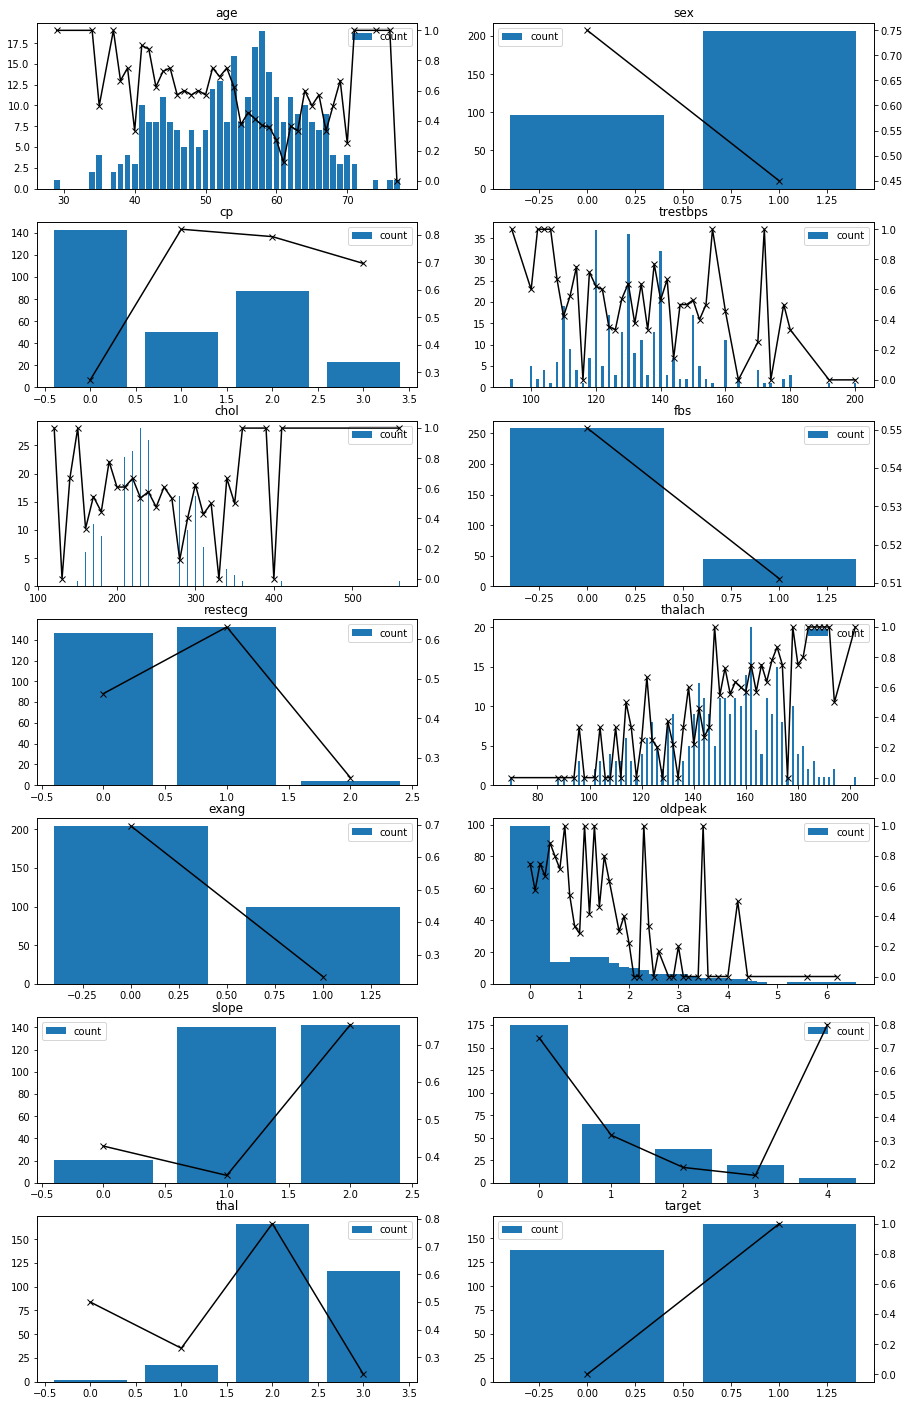

In [6]:
round_dict = {
    'trestbps': 2,
    'chol': 10,
    'thalach': 2,
    'oldpeal': 1,
}

fig, axs = plt.subplots(7, 2, figsize=(15,25))

for i, c in enumerate(data.columns[:14]):
    if c in round_dict:
        data['tmp'] = data[c] - (data[c] % round_dict[c])
        tmp = data.groupby('tmp')[['target']].agg(['count', 'mean']).sort_index().reset_index()
    else:
        tmp = data.groupby(c)[['target']].agg(['count', 'mean']).sort_index().reset_index()
    tmp.columns = [c, 'count', 'mean']

    axs[i // 2, i % 2].bar(x=tmp[c], height=tmp['count'], label='count')
    axs[i // 2, i % 2].twinx().plot(tmp[c], tmp['mean'], marker='x', color='black', label='mean')
    axs[i // 2, i % 2].set_title(c)
    axs[i // 2, i % 2].legend()

#### Сравнение моделей

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
   data[data.columns[:-2]], data.target, test_size=0.33, random_state=42)

In [8]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=10)
clf.fit(X_train, y_train)

print('train: ', roc_auc_score(y_train, clf.predict(X_train)))
print('test: ', roc_auc_score(y_test, clf.predict(X_test)))

train:  0.8699376947040498
test:  0.8099343185550082


In [9]:
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

print('train: ', roc_auc_score(y_train, clf.predict(X_train)))
print('test: ', roc_auc_score(y_test, clf.predict(X_test)))

train:  0.883956386292835
test:  0.7980295566502462


In [10]:
clf = RandomForestClassifier(random_state=0, n_estimators=100, min_samples_leaf=4)
clf.fit(X_train, y_train)

print('train: ', roc_auc_score(y_train, clf.predict(X_train)))
print('test: ', roc_auc_score(y_test, clf.predict(X_test)))

train:  0.9349688473520249
test:  0.8563218390804599
